# AST 384C - Computational Astrophysics - HW 1
## Carlos Jurado

In [2]:
# Python package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import timeit

# Loading in style file for plots
plt.style.use('/Users/caj3577/Desktop/plotting.mplstyle')

## Problem 1: 
Compute the integral

$$ \int_1^5 = \frac{1}{x^{3/2}} dx$$

with the three methods (Rectangle Rule, Trapezoid Rule, Simposon's Rule) and plot the error in the numerical integral against the step
size ∆x (or number of bins N) for several values of N ∈[5, 1000] for each method. Time
each calculation as well (time.timeit will work well in python). Approximately how
many steps are required to get an answer with a relative error of |I−Iexact|/Iexact < 10−3?
What about 10−5? What did you lean about the trade-off between method, accuracy and
calculation speed? (Note: you can test your implementation against the implementations in
scipy.integrate.)

In [3]:

def integrate_rectangles(func, N, a, b):
    ''' 
    Numerically integrates a function using the Rectangle method

    func - The function to integrate over 
    N - The number of rectangles to compute the total intergral with 
    a - The lower bound of integration 
    b - The upper bound of integration 
    '''
    
    suma = []
    delta_x = (b-a)/N

    for i in range(N):
        i = i + 1 #indexing stars at 0 in python
        x_i = a + (i-1)*delta_x # Computing left endpoint rectangles
        sum_i = func(x_i) * delta_x
        suma.append(sum_i)

    return sum(suma)


def integrate_trapezoids(func, N, a, b):
    ''' 
    Numerically integrates a function using the Trapezoid method

    func - The function to integrate over 
    N - The number of Trapezoid to compute the total intergral with 
    a - The lower bound of integration 
    b - The upper bound of integration 
    '''

    suma = 0
    delta_x = (b-a)/N
    x_i1 = a #initialize left edge of trapezoid 


    for i in range(N):
        i = i + 1 #indexing starts at 0 in python
        x_i2 = a + (i)*delta_x

        sum_i = ( func(x_i1) + func(x_i2) )/2 * delta_x
        suma += sum_i


        x_i1 = x_i2
        

    return suma
    
    

def integrate_simpson(func, N, a, b):
    ''' 
    Numerically integrates a function using Simpson's Rule.

    func - The function to integrate
    N - The number of subintervals (should be even for Simpson's rule)
    a - Lower bound of integration
    b - Upper bound of integration
    '''
    if N % 2 == 1:
        N += 1 

    delta_x = (b - a) / N
    odd_sums = []
    even_sums = []
    
    for i in range(1, N):
        x_i = a + i * delta_x 
        if i % 2 != 0:  # Odd indices
            odd_sums.append(func(x_i))
        else:  # Even indices 
            even_sums.append(func(x_i))

    return (delta_x)/3 * ( func(a) + 4 * np.sum(odd_sums) + 2*np.sum(even_sums) + func(b) )
        




In [4]:
def f1(x):
    return (1/x**(3/2))

N_array = np.logspace(np.log10(5), np.log10(2000), 50, dtype=int)


#Initializing empty list that will hold the value of the integral and the time of completion for the array of step sizes
value_rectangles_arr, value_trapezoids_arr, value_simpsion_arr = [], [], []
time_rectangles_arr, time_trapezoids_arr, time_simpsion_arr = [], [], []

for N in N_array:
    b, a = 1, 5

    time_rectangles = timeit.timeit(lambda: integrate_rectangles(f1, N, b, a), number=1)
    time_rectangles_arr.append(time_rectangles)
    value_rectangles = integrate_rectangles(f1, N, b, a)
    value_rectangles_arr.append(value_rectangles)

    time_trapezoids = timeit.timeit(lambda: integrate_trapezoids(f1, N, b, a), number=1)
    time_trapezoids_arr.append(time_trapezoids)
    value_trapezoids = integrate_trapezoids(f1, N, b, a)
    value_trapezoids_arr.append(value_trapezoids)

    time_simpsion = timeit.timeit(lambda: integrate_simpson(f1, N, b, a), number=1)
    time_simpsion_arr.append(time_simpsion)
    value_simpsion = integrate_simpson(f1, N, b, a)
    value_simpsion_arr.append(value_simpsion)
    


Calculating the integral analytically gives: 

$$ \int_1^5 = \frac{1}{x^{3/2}} = [2x^{-1/2}]_5^1 = 1.10557$$



In [5]:
## Calculating the relative errors
value_analytical = 2*(1)**(-1/2) - 2*(5)**(-1/2)
print(value_analytical)


err_rectangles_arr = ( np.array(value_rectangles_arr) - value_analytical)/value_analytical
err_trapezoids_arr = ( np.array(value_trapezoids_arr) - value_analytical)/value_analytical
err_simpsion_arr = np.abs(( np.array(value_simpsion_arr) - value_analytical)/value_analytical)

1.1055728090000843


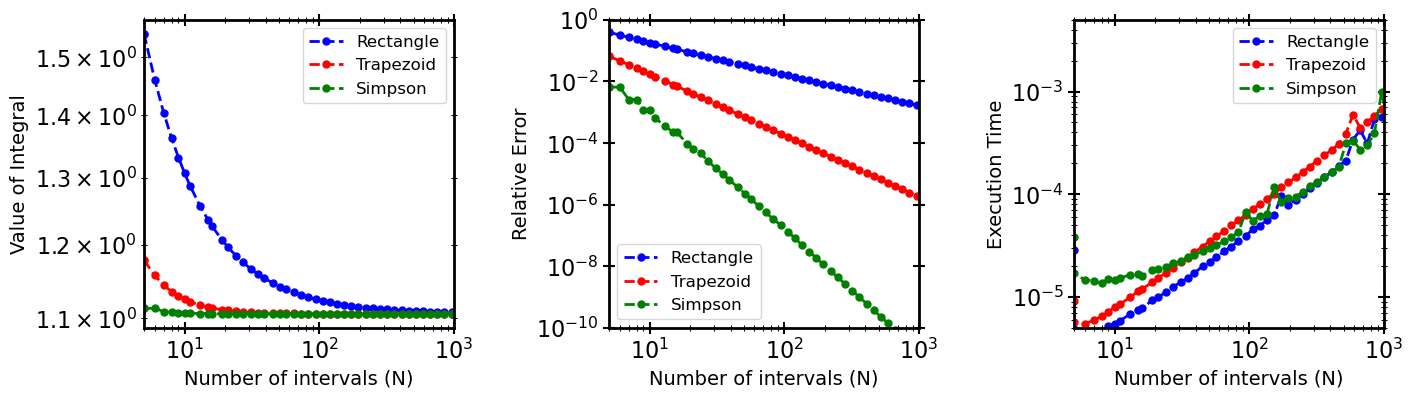

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0].loglog(N_array, value_rectangles_arr, color='b', marker='o', markersize=5, linestyle = '--', label='Rectangle')

axs[0].loglog(N_array, value_trapezoids_arr, color='r', marker='o', markersize=5, linestyle = '--', label='Trapezoid')

axs[0].loglog(N_array, value_simpsion_arr, color='g', marker='o', markersize=5, linestyle = '--', label='Simpson')


axs[0].set_xlim(5, 1000)
axs[0].set_xlabel('Number of intervals (N)')
axs[0].set_ylabel('Value of Integral')
axs[0].legend()

#############################################################################################################
#############################################################################################################
#############################################################################################################


axs[1].loglog(N_array, err_rectangles_arr, color='b', marker='o', markersize=5, linestyle = '--', label='Rectangle')

axs[1].loglog(N_array, err_trapezoids_arr, color='r', marker='o', markersize=5, linestyle = '--', label='Trapezoid')

axs[1].loglog(N_array, err_simpsion_arr, color='g', marker='o', markersize=5, linestyle = '--', label='Simpson')

axs[1].set_xlabel('Number of intervals (N)')
axs[1].set_ylabel('Relative Error')
axs[1].set_xlim(5, 10**3)
axs[1].set_ylim(10**-10, 1)
axs[1].legend()

#############################################################################################################
#############################################################################################################
#############################################################################################################


axs[2].loglog(N_array, time_rectangles_arr, color='b', marker='o', markersize=5, linestyle = '--', label='Rectangle')

axs[2].loglog(N_array, time_trapezoids_arr, color='r', marker='o', markersize=5, linestyle = '--', label='Trapezoid')

axs[2].loglog(N_array, time_simpsion_arr, color='g', marker='o', markersize=5, linestyle = '--', label='Simpson')


axs[2].set_xlabel('Number of intervals (N)')
axs[2].set_ylabel('Execution Time')
axs[2].set_xlim(5, 10**3)
axs[2].set_ylim(5 * 10**-6, 5 * 10**-3)
axs[2].legend()


In [7]:
def min_err(N_arr, err_arr, threshold):
    ''' 
    Calculates the number of steps needed for a relative error below the threshold

    N_arr: Array of step sizes
    err_arr: Array of relative errors at every step size 
    threshold: The precison at which the relative error is below

    '''
    for N, err in zip(err_arr, N_arr):
        if err < threshold: 
            
            return N
    else:
        print(f'Relative error is not below {threshold}')


rect_1e3 = min_err(err_rectangles_arr, N_array, 10**(-3))
trap_1e3 = min_err(err_trapezoids_arr, N_array, 10**(-3))
simp_1e3 = min_err(err_simpsion_arr, N_array, 10**(-3))



#redoing for the rectangles with less sampling 
N_array_extended = np.logspace(np.log10(5), np.log10(200000), 100, dtype=int)

value_rectangles_arr  = []
for N in N_array_extended:
    b, a = 1, 5
    value_rectangles_arr.append(integrate_rectangles(f1, N, b, a))
err_rectangles_arr = ( np.array(value_rectangles_arr) - value_analytical)/value_analytical



rect_1e5 = min_err(err_rectangles_arr, N_array_extended, 10**(-5))
trap_1e5 = min_err(err_trapezoids_arr, N_array, 10**(-5))
simp_1e5 = min_err(err_simpsion_arr, N_array, 10**(-5))


In [8]:
print(f'Rectangle Method: {rect_1e3} steps are needed for a precision of 10^-3.')
print(f'Trapezoid Method: {trap_1e3} steps are needed for a precision of 10^-3. ')
print(f'Simpson Method: {simp_1e3} steps are needed for a precision of 10^-3. \n')

print('=======================================================================')

print(f'\nRectangle Method: {rect_1e5} steps are needed for a precision of 10^-5. ')
print(f'Trapezoid Method: {trap_1e5} steps are needed for a precision of 10^-5. ')
print(f'Simpson Method: {simp_1e5} steps are needed for a precision of 10^-5. ')

Rectangle Method: 1769 steps are needed for a precision of 10^-3.
Trapezoid Method: 45 steps are needed for a precision of 10^-3. 
Simpson Method: 11 steps are needed for a precision of 10^-3. 


Rectangle Method: 179698 steps are needed for a precision of 10^-5. 
Trapezoid Method: 461 steps are needed for a precision of 10^-5. 
Simpson Method: 35 steps are needed for a precision of 10^-5. 


What did you lean about the trade-off between method, accuracy and
calculation speed?

The least complex method to code is the rectangle method followed by the trapezoid and simpson's method. The calculation speed and precision increase proportionally as the code complexity of the method increases. So Simpson's method was the most difficult to code, tended towards high precison quickly, and longer calculation times as the number of steps increased. On the other hand, the rectangle method was the most straight-forward to implement but took a large number of steps and time to converge on the analytical value. 

## Problem 2: 


In class (Thursday, January 30), we talked about generating positions that follow a
Hernquist (1990) density profile, which is a good match to galaxy bulges and dark matter
halos. It is also convenient in that (1) the total mass is finite, and (2) the density profile can
be expressed directly as a function of the gravitational potential.
For this question, you will go one step farther and also generate velocities. These are
determined by requiring that the Hernquist halo be spherical and isotropic and obey the
Poisson equation, which relates density to potential. This means the distribution function
f (x, v) is a function of energy E alone, f = f (E) (see equation 17 of Hernquist).
Assume the following parameters for the density profile:
• M = 10^12 M⊙
• a = 35 kpc
• total number of particles: N = 10^6


Your solution for this problem should include (1) executable code (that I can compile and
run or just run) that produces the positions and velocities of the particles, and (2) a
description of what your code does (i.e., what you’ve done and why; basically, extensive
commenting). You can use as a starting point the notebook that I distributed from class on
2025.1.30 if you like.
Some hints:
• For each particle i, you’ll need to randomly sample from the underlying velocity
distribution function, p(v|ri). Note that p(E|ri) ∝f (E) √φi −E where φi = φ(ri) is the
gravitational potential for a particle at position ri (see Eq. 5 from Hernquist) and
E = φ(ri) −v2 /2 is the binding energy. This means you can use the distribution
function f (E) to select an energy corresponding to each particle’s radius, then convert
that energy to a velocity. For each position ri, there is a maximum energy attainable,
which you’ll have to take into account when sampling from f (E) √φi −E. One way to
sample the distribution function f (E) √φi −E is via the acceptance-rejection
technique (which can be found in Press et al. 1993, Numerical Recipes; I put a copy of
this in the Files section on Canvas on 2025.01.30). This is a very handy technique to
have in your toolbox.
• Then, you’ll have to get random velocity components vi from the magnitude of the
velocity vector |v|.



Test that your velocities are correctly sampled by computing the radial component of the
velocities, vr ≡⃗v ·ˆr and computing ⟨v2r ⟩1/2 in (logarithmic) radial bins; this quantity is the
velocity dispersion and the square of it is given in Eq. 10 of Hernquist, so compare your
result to that.
How efficient was your code? What part was the slowest? Is it equally efficient in selecting
velocities at all radii, and why or why not?
2


# Useful Functions and Variables

In [9]:
# total number of particles
nptot=10**6
# total mass of halo (in M_sun)
mtot=1e12
# Hernquist scale radius (in kpc)
a=35.0

# Newton's constant, where M is in M_sun, v is in km/s, and r is in kpc:
G=4.30071e-6


def Hern_velocity_disper(M, a, r):
    return np.sqrt( (G*M/(12*a)) * ( ( (12*r*(r+a)**3)/a**4 )*np.log( (r+a)/r ) ) - (r/(r+a))*(25 + 52*r/a +42*(r/a)**2 + 12*(r/a)**3 )  ) 



# Generating a sample of positions for the particles

In [18]:
my_randState=np.random.RandomState(seed=1234)

rand_vals=my_randState.rand(nptot)
r=np.sort(1/(rand_vals**(-0.5)-1.))
r *= a



'''
minlogr=np.log10(r.min())
maxlogr=np.log10(r.max())
# binsize, in log10:
logbinsize=0.15
binedges=np.r_[minlogr:maxlogr:logbinsize]

numbins=binedges.size-1
rhobinned, edges_test=np.histogram(np.log10(r), binedges)


bincenters=10.**(binedges[:-1]+logbinsize/2.0)
rho=rhobinned*(mtot/nptot)/4./np.pi/logbinsize/np.log(10)/bincenters**3
def hernquist_rho(rr): return mtot/2/np.pi/a**3/(rr/a)/(1+rr/a)**3
plt.figure(figsize=(6,6))
plt.loglog(bincenters, rho, 'k-', lw=3, label='Binned')
plt.loglog(bincenters, hernquist_rho(bincenters), 'm--', lw=1.5, label='Analytic')
plt.xlim(10.**(minlogr), 10.**(maxlogr))
plt.xlabel(r'$r\,[{\rm kpc}]$')
plt.ylabel(r'$\rho\,[M_{\odot}\,{\rm kpc}^{-3}]$')
plt.legend(frameon=False)
'''

<>:9: SyntaxWarning: invalid escape sequence '\,'
<>:9: SyntaxWarning: invalid escape sequence '\,'
/var/folders/ll/mvv630sd4pjb3m9_pc1s5dg40000gr/T/ipykernel_97590/2423697994.py:9: SyntaxWarning: invalid escape sequence '\,'
  '''


"\nminlogr=np.log10(r.min())\nmaxlogr=np.log10(r.max())\n# binsize, in log10:\nlogbinsize=0.15\nbinedges=np.r_[minlogr:maxlogr:logbinsize]\n\nnumbins=binedges.size-1\nrhobinned, edges_test=np.histogram(np.log10(r), binedges)\n\n\nbincenters=10.**(binedges[:-1]+logbinsize/2.0)\nrho=rhobinned*(mtot/nptot)/4./np.pi/logbinsize/np.log(10)/bincenters**3\ndef hernquist_rho(rr): return mtot/2/np.pi/a**3/(rr/a)/(1+rr/a)**3\nplt.figure(figsize=(6,6))\nplt.loglog(bincenters, rho, 'k-', lw=3, label='Binned')\nplt.loglog(bincenters, hernquist_rho(bincenters), 'm--', lw=1.5, label='Analytic')\nplt.xlim(10.**(minlogr), 10.**(maxlogr))\nplt.xlabel(r'$r\\,[{\rm kpc}]$')\nplt.ylabel(r'$\rho\\,[M_{\\odot}\\,{\rm kpc}^{-3}]$')\nplt.legend(frameon=False)\n"

# Sampling Velocities 

# Plotting

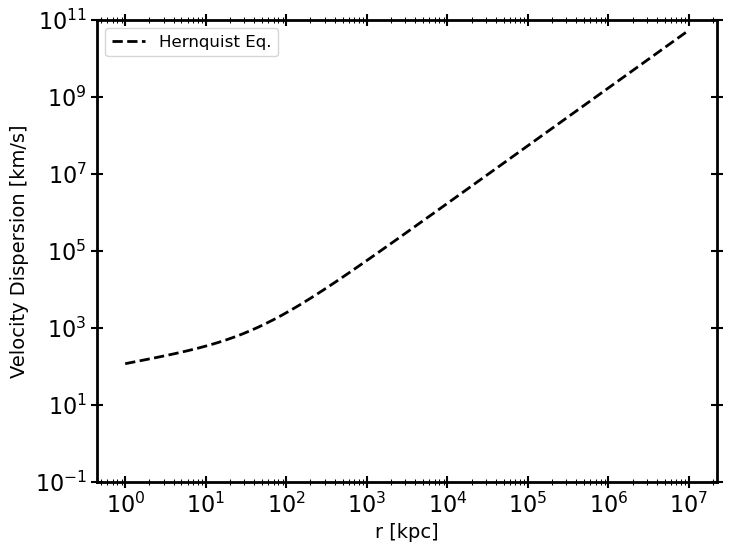

In [11]:
r_disper = np.logspace(0, 7, num=20000) #in kpc
v_disper = Hern_velocity_disper(mtot, a, r_disper)

plt.loglog(r_disper, v_disper, color = 'black', linestyle = '--',
           label = 'Hernquist Eq.', lw=2)

plt.xlabel('r [kpc]')
plt.ylim(10**-1, 10**11)
plt.ylabel('Velocity Dispersion [km/s]')
plt.legend()